En este proyecto queremos resolver la evolución temporal de un sistema cuántico, el cual está gobernado por la ecuación de Schrödinger:

\begin{equation}
\frac{\partial |\psi(t)\rangle}{\partial t}  = -i \hat{H} |\psi(t)\rangle, 
\end{equation}
cuya solución formal está dada por
\begin{equation}
|\psi(t)\rangle = e^{-i \hat{H} (t - t_0)} |\psi(t= t_0)\rangle .
\end{equation}

El modelo de Ising en una dimensión corresponde a

\begin{equation}
\hat{H} = -J \sum_{i=1}^N \hat{\sigma}_i^z \hat{\sigma}_{i+1}^z - g \sum_{i=1}^N \hat{\sigma}_i^x.
\end{equation}

Para resolver este problema, se plantean dos metodologías. Resolver la ecuación diferencial directamente de manera númerica o evaluar la exponencial de manera númerica. Para esto se va a utilizar el método de Runge-Kutta de orden 4 y la diagonalización del Hamiltoniano para evualuar la exponencial. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

Importamos las librerías necesarias utilizadas en la solución del problema
* Numpy para poder realizar todos los cálculos numéricos. 
* Matplotlib para graficar todos los resultados obtenidos. 
* Time para poder medir el tiempo que tarda en ejecutarse las distintas metodologías (RK4 y Diagonalización) 

In [3]:
class Clase_Hamiltoniano:
    def __init__(self, N, J, G, matrices_pauli):
        self.N = N  # Número de spins (o iteraciones)
        self.J = J  # Interacción entre spins
        self.G = G  # Campo magnético
        self.pauli_x, self.pauli_y, self.pauli_z, self.identidad = matrices_pauli
        # Inicializa el Hamiltoniano como una matriz de ceros de tamaño 2^N x 2^N
        self.matriz_hamiltoniano = np.zeros((2**N, 2**N)) 

    # Método para calcular el producto directo de matrices
    def productodirecto(self, lista_matrices):
        resultado = lista_matrices[0]  # Inicializa el resultado con la primera matriz
        for k in lista_matrices[1:]:  # Itera sobre las matrices restantes
            resultado = np.kron(resultado, k)  # Calcula el producto de Kronecker
        return resultado
    
    # Método para construir el Hamiltoniano del modelo Ising
    def creacion_Hamiltoniano(self):
        # Parte del Hamiltoniano relacionada con pauli_z
        for i in range(self.N - 1):
            lista_matrices = [self.identidad] * self.N  # Crea una lista con N matrices identidad
            lista_matrices[i] = self.pauli_z  # Sustituye la i-ésima posición por la matriz pauli_z
            lista_matrices[i + 1] = self.pauli_z  # Sustituye la (i+1)-ésima posición por la matriz pauli_z
            # Actualiza el Hamiltoniano 
            self.matriz_hamiltoniano -= self.J * self.productodirecto(lista_matrices)  

        # Parte del Hamiltoniano relacionada con el pauli_x
        for i in range(self.N):
            lista_matrices = [self.identidad] * self.N  # Crea otra lista con N matrices identidad
            lista_matrices[i] = self.pauli_x  # Sustituye la i-ésima posición por la matriz pauli_x
            # Actualiza el Hamiltoniano 
            self.matriz_hamiltoniano -= self.G * self.productodirecto(lista_matrices) 
        
    # Método para mostrar el Hamiltoniano
    def mostrar_Hamiltoniano(self):
        print(self.matriz_hamiltoniano)  # Imprime el Hamiltoniano

Creamos una clase llamada Hamiltoniano, la cual contiene como atributos, el número de spines, el campo magnético y la interacción entre espines. También contiene las matrices de Pauli que va a utilizar para el cálculo. 

In [4]:
# Matrices de Pauli y la matriz identidad
paulix = np.array([[0, 1],
                    [1, 0]])  # Matriz de Pauli X
pauliy = np.array([[0, 1j],
                    [-1j, 0]])  # Matriz de Pauli Y
pauliz = np.array([[1, 0],
                    [0, -1]])  # Matriz de Pauli Z
identidad = np.eye(2)  # Matriz identidad de 2x2

Matrices = [paulix, pauliy, pauliz, identidad] # Lista con las matrices necesarias

Definimos las matrices de Pauli y la identidad. Las guardamos en una lista para pasarlas como argumento del Hamiltoniano y de esta manera no sean variables globales.

In [5]:
# Parámetros del modelo Ising
N = np.array([2, 10]) #Vamos a visualizar la dinámica para dos valores de N
Interaccion_de_espines = 1.0  #Interacción entre espines
Campo_magnetico_externo = 1.0  #Campo magnético externo

Declaramos las variables del número de espines, la interacción entre estos y el campo magnético externo. Creamos una instancia de la clase Hamiltoniano. Imprimimos el resultado para verificar que el resultado esté correcto. Ahora procederemos a utilizarlo para resolver la ecuación diferencial utilizando el método RK4, y posteriormente se utilizará para resolver mediante el método de diagonalización.

In [6]:
# Definición de la ecuación de Schrödinger con h = 1
def Ec_Schrodinger(H, onda):
    return -1j * np.dot(H, onda) 

# Método de Runge-Kutta de cuarto orden (RK4)
def rk4(func, H, onda, h):
    k1 = h * func(H, onda)
    k2 = h * func(H, onda + 0.5 * k1)
    k3 = h * func(H, onda + 0.5 * k2)
    k4 = h * func(H, onda + k3)
    
    return onda + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)

Establecemos una función para la ecuación de Schrodinger y también una función que ejecuta el método de Runge-Kutta de orden 4. 
Ahora vamos a utilizar este método para resolver la ecuación diferencial.

El método RK4 para N = 2 duró: 0.0478s
El método RK4 para N = 2 duró: 0.1127s


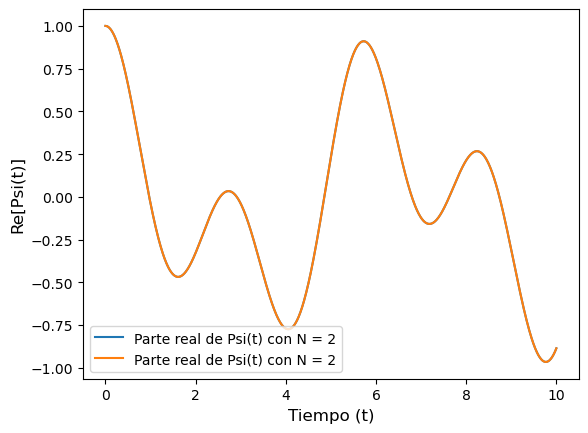

In [7]:
# Configuración de tiempos y condiciones iniciales
times = np.linspace(0.0, 10.0, 1000) # Tiempo
h = times[1] - times[0] # Espaciamiento
resultado = np.zeros(times.size) # Array con el resultado obtenido

t1 = time.time() # Para medir cuanto dura el método
# N es un array con 2 y 10
for n in range(N.size):
    Hamiltoniano = Clase_Hamiltoniano(N[0], Interaccion_de_espines, Campo_magnetico_externo, Matrices)  
    # Crea un Hamiltoniano de tamaño (2**N[n],2**N[n])
    Hamiltoniano.creacion_Hamiltoniano()  # Construye el Hamiltoniano
    
    onda = np.zeros(2**N[0]) # Onda a estudiar
    onda[0] = 1.0 # Estado inicial de la onda
    
    # Evolución en el tiempo
    for t in range(times.size):
        resultado[t] = onda[0].real
        onda = rk4(Ec_Schrodinger, Hamiltoniano.matriz_hamiltoniano, onda, h)
    print(f"El método RK4 para N = {N[0]} duró: {time.time() - t1:.4f}s") 
    # Tiempo que duró en realizarse el método
    # Grafica el resultado
    plt.plot(times, resultado, label=f"Parte real de Psi(t) con N = {N[0]}", color=f"C{n}")
    
#Fuera del for para tener los dos resultados ploteados a la vez
#Se etiquetan los ejes y se muestra la leyenda
plt.xlabel("Tiempo (t)", fontsize=12)
plt.ylabel("Re[Psi(t)]", fontsize=12)
plt.legend()    
plt.show()

El resultado obtenido y graficado es la primera entrada de la onda para cada tiempo $t$. Esto representa la probabilidad de que todos los electrones estén con el mismo espín en ese tiempo. Vemos que para N = 2, la probabilidad cambia de manera lenta en comparación a N = 10. Donde el resultado varía mucho y muy rápido.

Ahora se procede a implementar la solución utilizando la diagonalización del hamiltoniano.

In [9]:
def evolucion_temporal(onda_inicial, t, autovalores, autovectores):
    # Se calcula la representación de la onda inicial en la base de los autovectores.
    onda_nueva = np.dot(autovectores.conj().T, onda_inicial)
    
    # La evolución temporal de la onda se realiza multiplicando los autovectores 
    # por la exponencial de los autovalores multiplicados por el tiempo t 
    onda_t = np.dot(autovectores, np.exp(-1j * autovalores * t) * onda_nueva)
    
    return onda_t

Tiempo para N = 2: 0.0175 s
Tiempo para N = 10: 7.1846 s


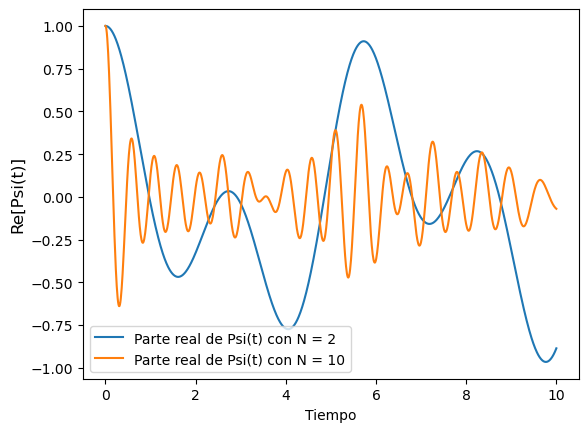

In [13]:
# Se mide el tiempo inicial para evaluar el rendimiento 
tiempo_inicial = time.time()

# N = [2,10]
for n in range(N.size):
    Hamiltoniano = Clase_Hamiltoniano(N[n], Interaccion_de_espines, Campo_magnetico_externo, Matrices)
    Hamiltoniano.creacion_Hamiltoniano() 
    # Este Hamiltoniano tiene tamaño (2**N[n], 2**N[n])
    # Diagonalización del Hamiltoniano
    autovalores, autovectores = np.linalg.eigh(Hamiltoniano.matriz_hamiltoniano) 
    
    # Se crea y define el estado inicial de la onda 
    onda_inicial = np.zeros(2**N[n])  
    onda_inicial[0] = 1.0  

    # Se define un array vacío para almacenar los resultados a lo largo del tiempo, utilizando
    # el mismo times que en el método anterior
    resultado2 = np.zeros(times.size) 
    
    for t in range(times.size):
        # Se calcula la onda evolucionada en el tiempo usando los autovalores y autovectores
        onda_t = evolucion_temporal(onda_inicial, times[t], autovalores, autovectores) 
        # Se guarda la parte real del primer componente de la onda en `resultado2`
        resultado2[t] = onda_t[0].real

    # Se calcula el tiempo que ha tardado el método
    print(f"Tiempo para N = {N[n]}: {time.time() - tiempo_inicial:.4f} s")  
    plt.plot(times, resultado2.real, label=f"Parte real de Psi(t) con N = {N[n]}", color=f"C{n}")  
    
# Se etiquetan los ejes y se muestra la leyenda
plt.xlabel('Tiempo')
plt.ylabel("Re[Psi(t)]", fontsize=12)
plt.legend()
plt.show()

Se observa que con esta metodología se evidencia el mismo comportamiento tanto para N = 2 como N = 10. También se observa que el método de diagonalización posee un tiempo de ejecución menor al método RK4. 

In [9]:
Hamiltoniano = Clase_Hamiltoniano(3, 1.0, 1.0, Matrices)
Hamiltoniano.creacion_Hamiltoniano() 
Hamiltoniano.mostrar_Hamiltoniano()

[[-2. -1. -1.  0. -1.  0.  0.  0.]
 [-1.  0.  0. -1.  0. -1.  0.  0.]
 [-1.  0.  2. -1.  0.  0. -1.  0.]
 [ 0. -1. -1.  0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0. -1. -1.  0.]
 [ 0. -1.  0.  0. -1.  2.  0. -1.]
 [ 0.  0. -1.  0. -1.  0.  0. -1.]
 [ 0.  0.  0. -1.  0. -1. -1. -2.]]
